# Descriptive Statistics

In [39]:
# Import Packages 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import ast
import nltk
from nltk.corpus import stopwords

In [44]:
data = pd.read_csv("C:/Users/stine/OneDrive/melchior_job/done_files/comments_new_female_nodups_prepro_lang.csv")
data = data[data['comment_body'] != '[deleted]']

In [59]:
stopwordlist = set(stopwords.words("danish"))
stopwordlist.update(['kunne','vide','lidt', 'mene', 'helt', 'goer', 'god', 'bruge', 'rette', 'nej', 'ja','lige', 'folk', 'fx', 'nb', 'goere', 'fordi', 'gøre', 'give', 'sige', 'vel', 'maa','bare', 'tro','removed','' 'komme', 'side', 'gaar', 'del', 'daa', 'se', 'du','og','til','kan','vores','brug','dine','første','ved','find','dit','mere','blevet','tager','søg','http','dk','søg','læs'])

test = [ast.literal_eval(row) for row in data['lemmatized_text']]

text = []
for lst in test:
    row = []
    for word in lst:
        if word not in stopwordlist:
            row.append(word)
    text.append(str(row))

# TF-IDF Weighted Words

In [60]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True, lowercase=False)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(text)

tfidf_weights = [(word, tfidf_vectorizer_vectors.getcol(idx).sum()) for word, idx in tfidf_vectorizer.vocabulary_.items()]

## Word Cloud

(-0.5, 2999.5, 1999.5, -0.5)

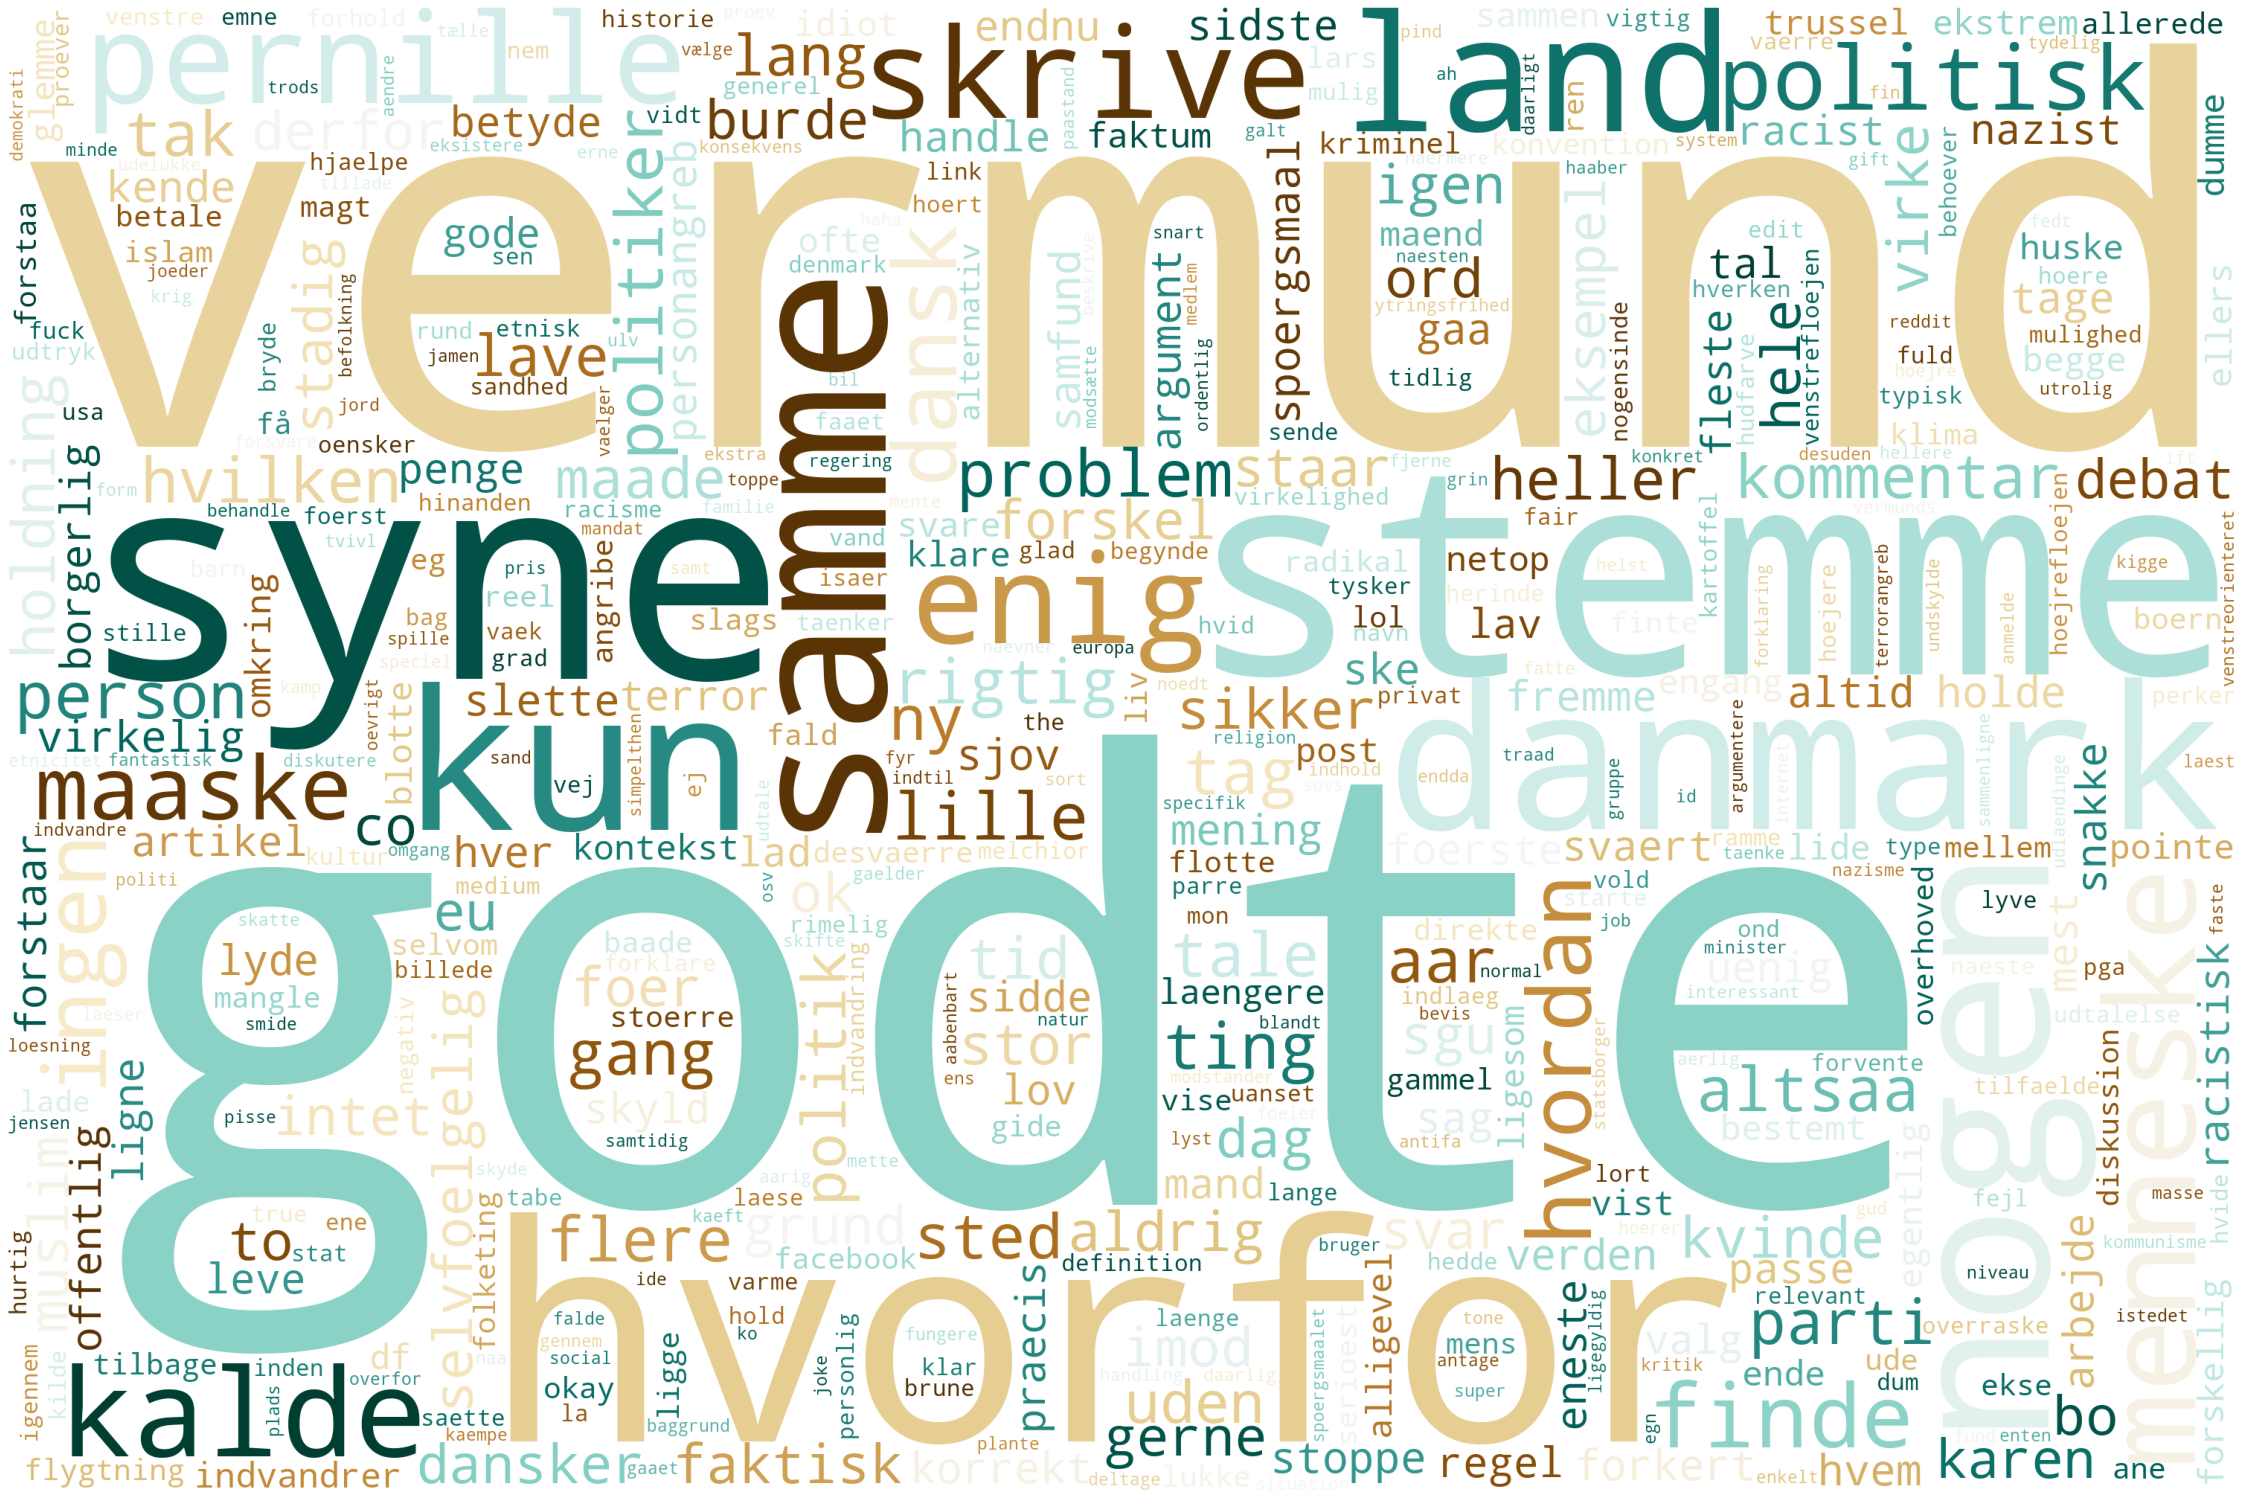

In [61]:
w = WordCloud(width=3000, height=2000, background_color='white', colormap="BrBG", min_word_length=3, max_words=500).fit_words(dict(tfidf_weights))

plt.figure(figsize=(40, 30))
plt.imshow(w)
plt.axis('off')


## Bar Chart

 Bar chart of the number of occurences of the top 20 TF-IDF weighted words.

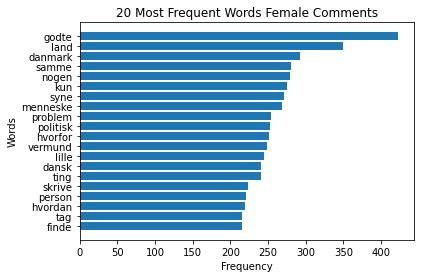

In [63]:
count_vectorizer = CountVectorizer()
count_vectorizer_vectors = count_vectorizer.fit_transform(text)

count_weights = [(word, count_vectorizer_vectors.getcol(idx).sum()) for word, idx in count_vectorizer.vocabulary_.items()]


words_freq =sorted(count_weights, key = lambda x: x[1], reverse= True)


x, y = list(zip(*words_freq[:20]))
plt.barh(x[::-1],y[::-1])
plt.xlabel("Frequency")
plt.ylabel('Words')
plt.title('20 Most Frequent Words Female Comments') # Change title to the data 
plt.show()

# Horizontal Stacked Bar Chart Over Upvote Ratio 

Only done for posts as these are the only ones with an upvote ratio. Bar charts show the number of posts with an upvote ratio in the 5 intervals 0 to 0.19, 0.20 to 0.39, 0.40 to 0.59, 0.60 to 0.79 and, 0.80 to 1. 

In [28]:
# Needs both dataset of posts about male and female politicians 
data_k = pd.read_csv("C:/Users/stine/OneDrive/melchior_job/done_files/posts_new_female_conc_nodups_prepro_lang.csv")
da_data_k = data_k[data_k.lang.isin(['da', 'no', 'sv'])]

data_m = pd.read_csv("C:/Users/stine/OneDrive/melchior_job/done_files/posts_male_conc_lang_prepro.csv")
da_data_m = data_m[data_m.lang.isin(['da', 'no', 'sv'])]

In [29]:
zero_20 = da_data_m[da_data_m.upvote_ratio.between(0, 0.19)]
twen_40 = da_data_m[da_data_m.upvote_ratio.between(0.20, 0.39)]
for_60 = da_data_m[da_data_m.upvote_ratio.between(0.40, 0.59)]
six_80 = da_data_m[da_data_m.upvote_ratio.between(0.60, 0.79)]
eigh_100 = da_data_m[da_data_m.upvote_ratio.between(0.80, 1)]


zero_20_k = da_data_k[da_data_k.upvote_ratio.between(0, 0.19)]
twen_40_k = da_data_k[da_data_k.upvote_ratio.between(0.20, 0.39)]
for_60_k = da_data_k[da_data_k.upvote_ratio.between(0.40, 0.59)]
six_80_k = da_data_k[da_data_k.upvote_ratio.between(0.60, 0.79)]
eigh_100_k = da_data_k[da_data_k.upvote_ratio.between(0.80, 1)]

intervals = ['0 to 0.19', '0.20 to 0.39', '0.40 to 0.59', '0.60 to 0.79', '0.80 to 1']  
male_count = [(len(zero_20)/len(da_data_m))*100, (len(twen_40)/len(da_data_m))*100, (len(for_60)/len(da_data_m))*100, (len(six_80)/len(da_data_m))*100, (len(eigh_100)/len(da_data_m))*100]  
female_count = [(len(zero_20_k)/len(da_data_k))*100, (len(twen_40_k)/len(da_data_k))*100, (len(for_60_k)/len(da_data_k))*100, (len(six_80_k)/len(da_data_k))*100, (len(eigh_100_k)/len(da_data_k))*100] 


Text(0.5, 1.0, 'Upvote Ratio of Reddit Posts Concerning Female and Male Politicians')

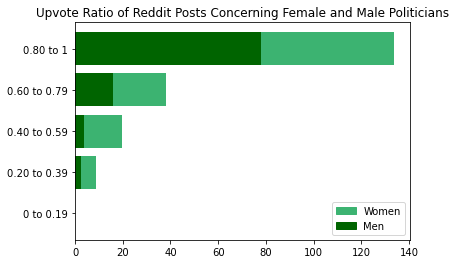

In [30]:
# Plotting 
plt.barh(intervals, male_count, color="darkgreen")  
plt.barh(intervals, female_count, left=male_count, color="mediumseagreen")

# Adding legend
colors = {'Women':'mediumseagreen', 'Men':'darkgreen'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc="lower right")

#Adding title
plt.title("Upvote Ratio of Reddit Posts Concerning Female and Male Politicians")